<a href="https://colab.research.google.com/github/amritavarshini04/Elevate_labs_tasks/blob/main/Elevate_labs_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import dataset

In [ ]:
df=pd.read_csv('Titanic-Dataset.csv')

Display the basics

In [ ]:
print('First few rows: ')
print(df.head())

First few rows: 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

Check for the missing values

In [ ]:
print(df.isnull().sum())
df.fillna(df.mean(numeric_only=True),inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Check if any missing values still there

In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Convert categorical features into numerical using encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

Drop unnecessary columns

In [ ]:
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')

fill missing values

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-10-f3c0c36ea331>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-10-f3c0c36ea331>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [ ]:
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

Normalize/Standardize numerical features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Survived')

In [ ]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
print("\nData after encoding and normalization:")
print(df.head())


Data after encoding and normalization:
   PassengerId  Survived    Pclass       Sex       Age     SibSp     Parch  \
0    -1.730108         0  0.827377 -0.737695 -0.592481  0.432793 -0.473674   
1    -1.726220         1 -1.566107  1.355574  0.638789  0.432793 -0.473674   
2    -1.722332         1  0.827377  1.355574 -0.284663 -0.474545 -0.473674   
3    -1.718444         1 -1.566107  1.355574  0.407926  0.432793 -0.473674   
4    -1.714556         0  0.827377 -0.737695  0.407926 -0.474545 -0.473674   

       Fare  Embarked_Q  Embarked_S  
0 -0.502445       False        True  
1  0.786845       False       False  
2 -0.488854       False        True  
3  0.420730       False        True  
4 -0.486337       False        True  


Visualize outliers using boxplots

In [ ]:
import seaborn as sns

ValueError: num must be an integer with 1 <= num <= 6, not 7

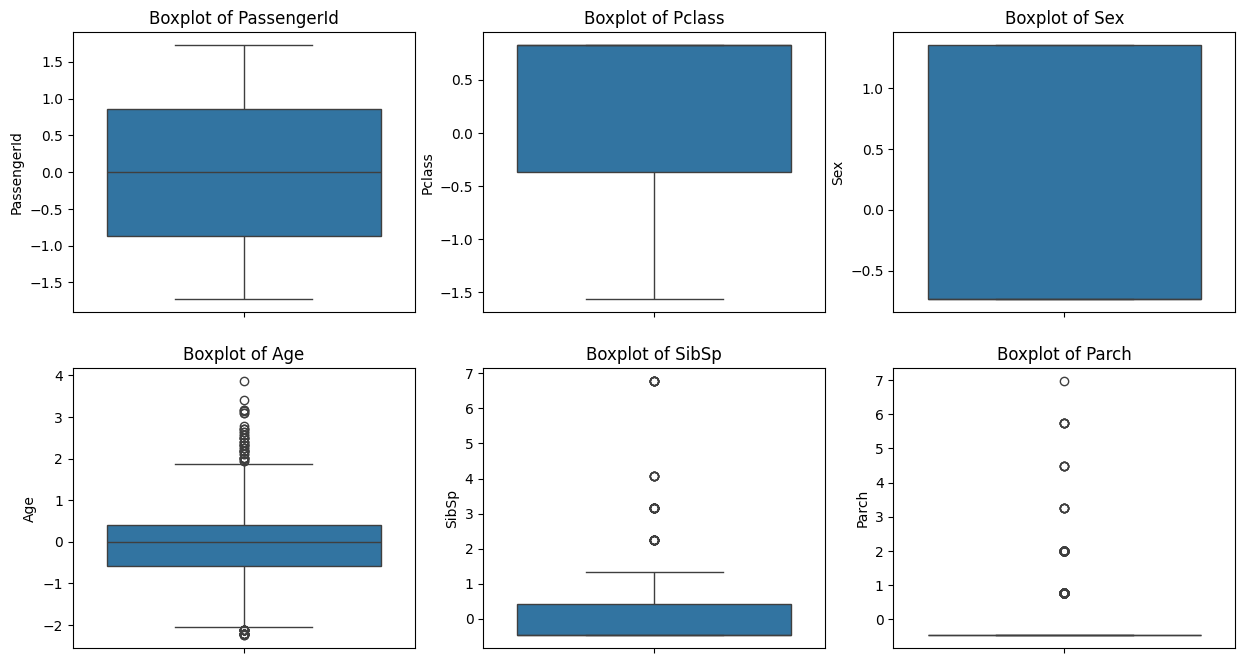

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()